In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('dataset/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Cleaning and EDA

<Axes: xlabel='stroke', ylabel='count'>

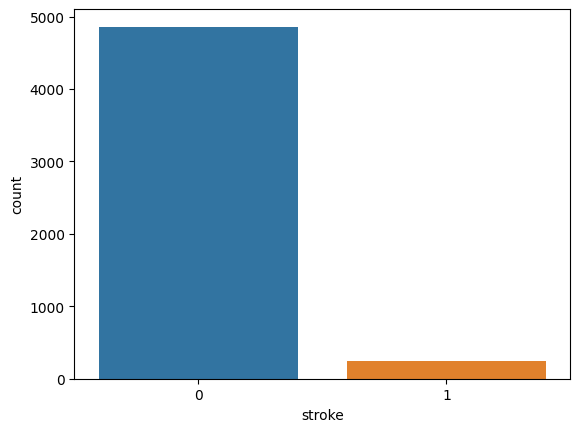

In [7]:
sns.countplot(data = df, x='stroke')

We can see that this dataset is imbalanced as there are more samples of people who do not have any stroke

In [8]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

# Handling Imbalanced data

In [9]:
stroke_0 = df[df['stroke']==0]
stroke_0.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [10]:
stroke_1 = df[df['stroke']==1]
stroke_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
stroke_1_upsampled = resample(stroke_1,replace=True,n_samples=(len(stroke_0)-len(stroke_1)))
stroke_1_upsampled.shape

(4612, 12)

In [12]:
stroke_0.shape

(4861, 12)

In [13]:
stroke_1 = pd.concat([stroke_1,stroke_1_upsampled])

In [14]:
df = pd.concat([stroke_0,stroke_1],ignore_index=True)

In [15]:
df.shape

(9722, 12)

<Axes: xlabel='stroke', ylabel='count'>

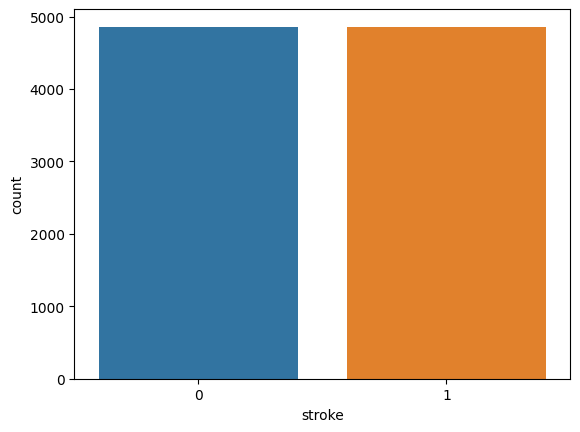

In [16]:
sns.countplot(data=df,x='stroke')

In [17]:
df.drop(['id'],axis=1,inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [18]:
df['stroke'].value_counts()

stroke
0    4861
1    4861
Name: count, dtype: int64

# The dataset is now balanced

# Handling missing values

In [19]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  954
smoking_status         0
stroke                 0
dtype: int64

In [20]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

<Axes: xlabel='bmi', ylabel='Count'>

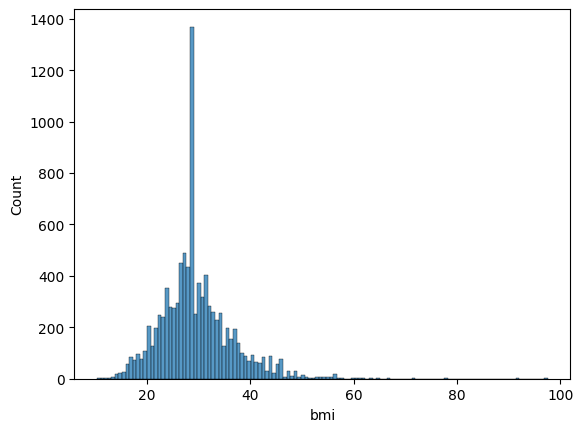

In [21]:
sns.histplot(data=df,x='bmi')

In [22]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Missing Values have been taken care

# EDA

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

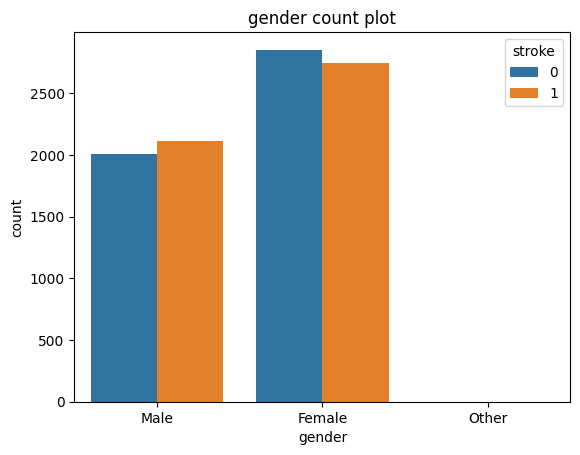

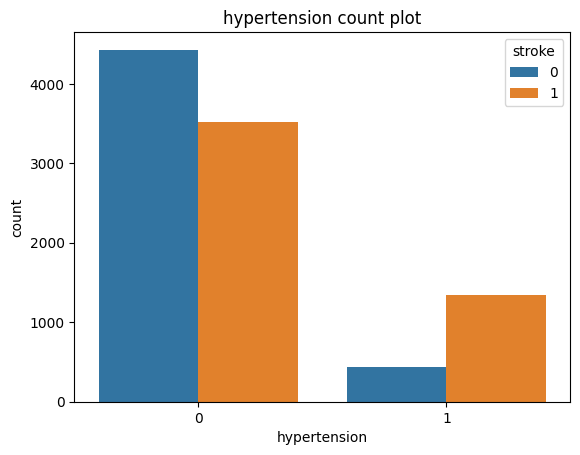

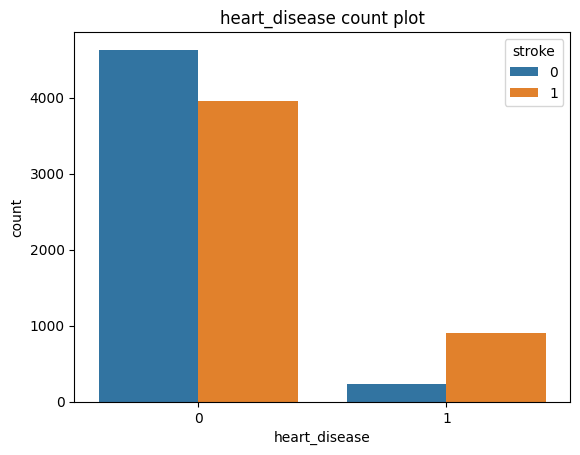

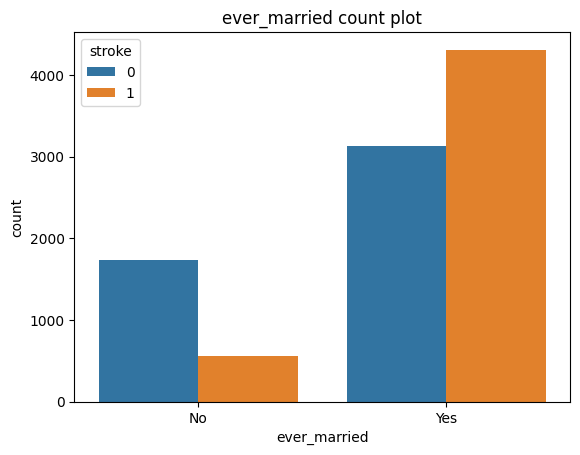

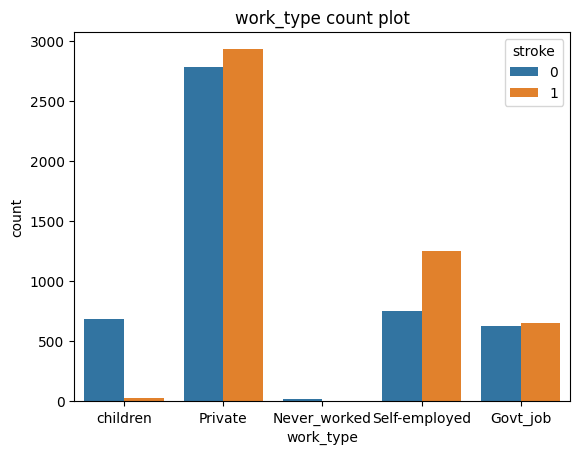

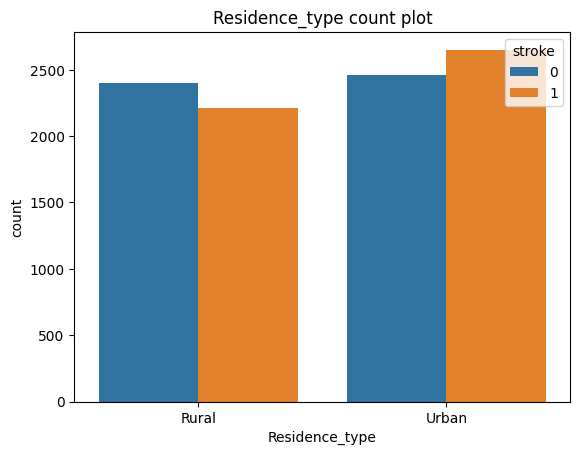

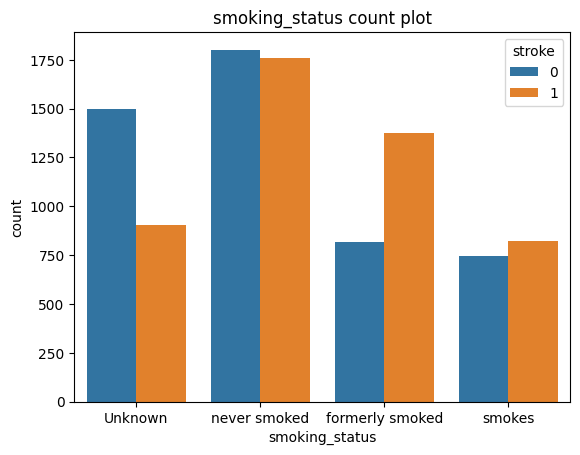

In [25]:
for feature in categorical_features:
    sns.countplot(data=df, x=feature, hue='stroke')
    plt.title(feature+' count plot')
    plt.show()

Text(0.5, 1.0, 'Stroke of people having hypertension')

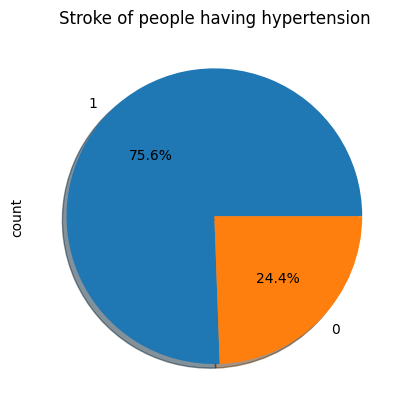

In [26]:
df[df['hypertension']==1]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke of people having hypertension')

By seeing this, we can conclude that, 75.1% of the people having hypertension, suffer from a stroke

Text(0.5, 1.0, 'Stroke of people having Heart Disease')

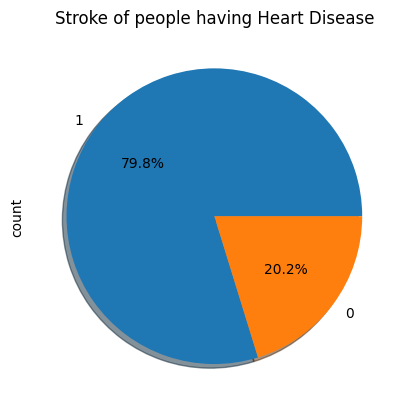

In [27]:
df[df['heart_disease']==1]['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke of people having Heart Disease')

We can see that, nearly 80% of the people having a heart disease suffer from a stroke

Text(0.5, 1.0, 'Stroke for people who have not married')

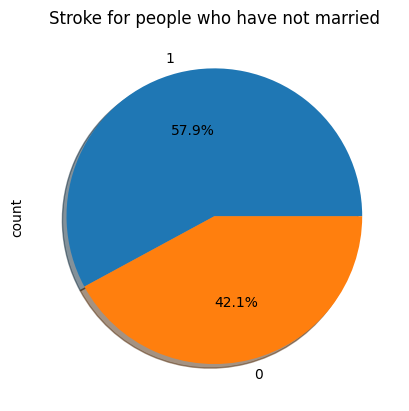

In [28]:
df[df['ever_married']=='Yes']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who have not married')

Text(0.5, 1.0, 'Stroke for people who have not married')

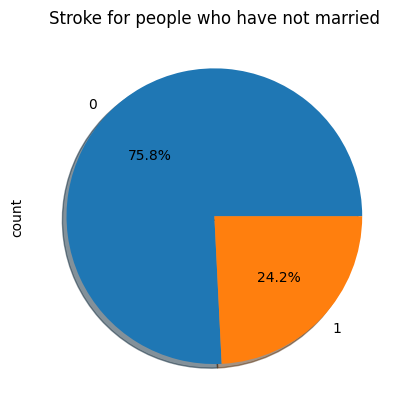

In [29]:
df[df['ever_married']=='No']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who have not married')

By seeing the above two plots, we can see that, the person after marrying has a 57% chance of suffering from a stroke. There is a slight chance that the person will suffer from a stroke before marriage itself as the percentage of stroke is just 25.2%

In [30]:
df['work_type'].value_counts()

work_type
Private          5702
Self-employed    2008
Govt_job         1274
children          716
Never_worked       22
Name: count, dtype: int64

Text(0.5, 1.0, 'Stroke for people who have a private job')

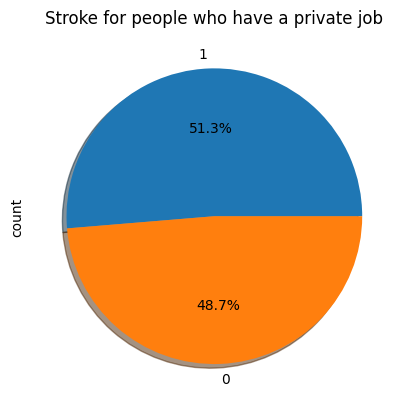

In [31]:
df[df['work_type']=='Private']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who have a private job')

Text(0.5, 1.0, 'Stroke for people who are self-employed')

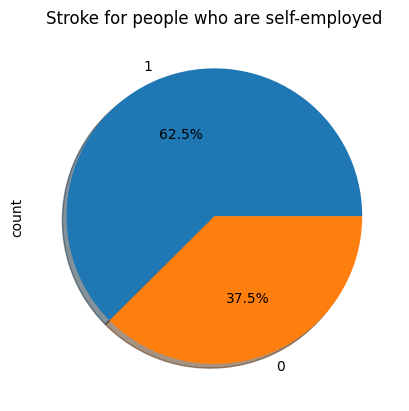

In [32]:
df[df['work_type']=='Self-employed']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who are self-employed')

Text(0.5, 1.0, 'Stroke for people who have a Govt_job')

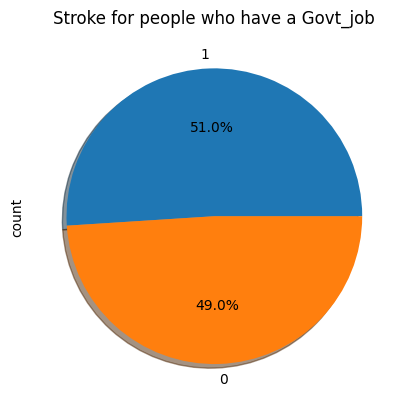

In [33]:
df[df['work_type']=='Govt_job']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who have a Govt_job')

Text(0.5, 1.0, 'Stroke for children')

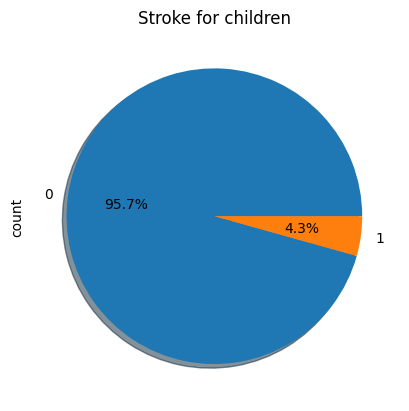

In [34]:
df[df['work_type']=='children']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for children')

Text(0.5, 1.0, 'Stroke for people who have never worked')

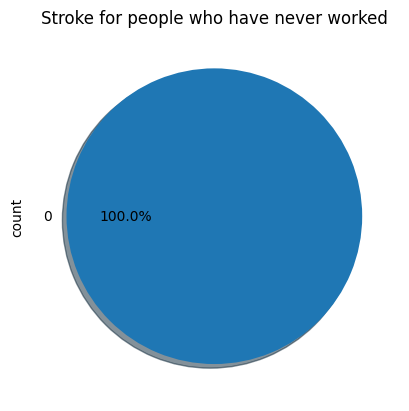

In [35]:
df[df['work_type']=='Never_worked']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who have never worked')

By comparing the above 5 plots, we can say that, a person who is self-employed is prone to a stroke more than the other fields.

In [36]:
df['smoking_status'].value_counts()

smoking_status
never smoked       3560
Unknown            2401
formerly smoked    2190
smokes             1571
Name: count, dtype: int64

Text(0.5, 1.0, 'Stroke for people who have not smoked')

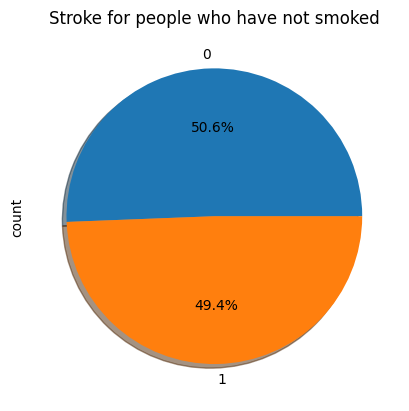

In [37]:
df[df['smoking_status']=='never smoked']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who have not smoked')

Text(0.5, 1.0, 'Stroke for people, we dont know whether they smoke or not')

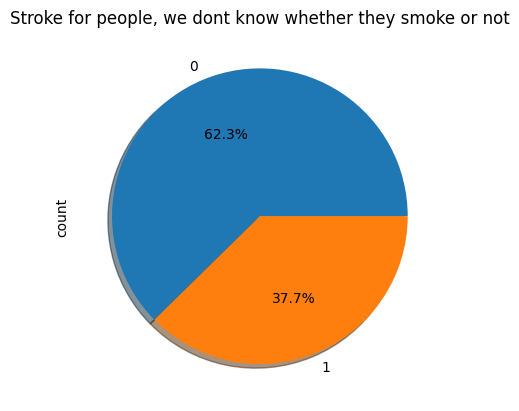

In [38]:
df[df['smoking_status']=='Unknown']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people, we dont know whether they smoke or not')

Text(0.5, 1.0, 'Stroke for people who used to smoke earlier')

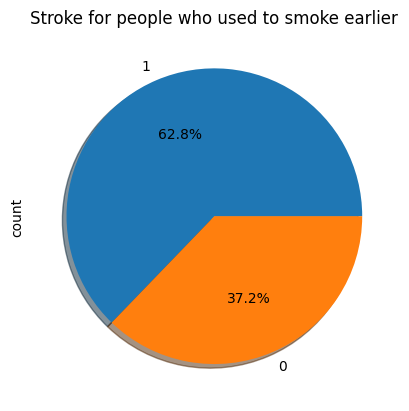

In [39]:
df[df['smoking_status']=='formerly smoked']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who used to smoke earlier')

Text(0.5, 1.0, 'Stroke for people who currently smoke')

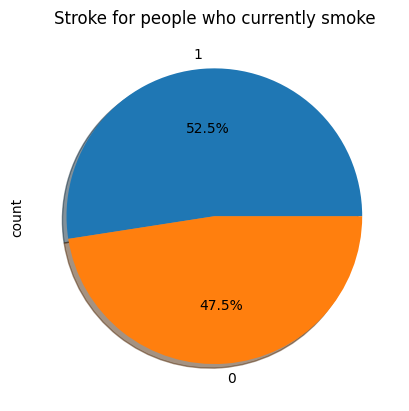

In [40]:
df[df['smoking_status']=='smokes']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who currently smoke')

By seeing these plots we can see that, a person who smoked before is at a higher risk of suffering from a stroke rather than a person who currently smokes

In [41]:
df['Residence_type'].value_counts()

Residence_type
Urban    5113
Rural    4609
Name: count, dtype: int64

Text(0.5, 1.0, 'Stroke for people who live in Urban areas')

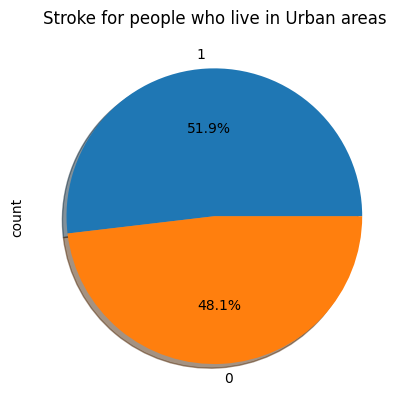

In [42]:
df[df['Residence_type']=='Urban']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who live in Urban areas')

Text(0.5, 1.0, 'Stroke for people who live in Rural areas')

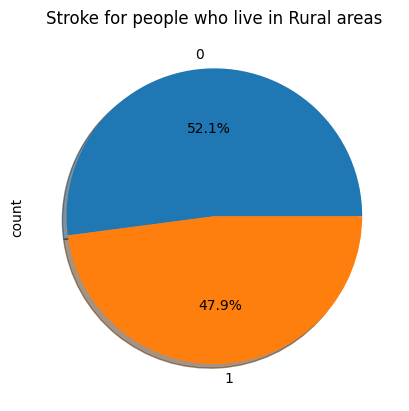

In [43]:
df[df['Residence_type']=='Rural']['stroke'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Stroke for people who live in Rural areas')

By seeing the above 2 plots, we cannot find any strong correlation between residency and stroke. Hence we will not be considering it

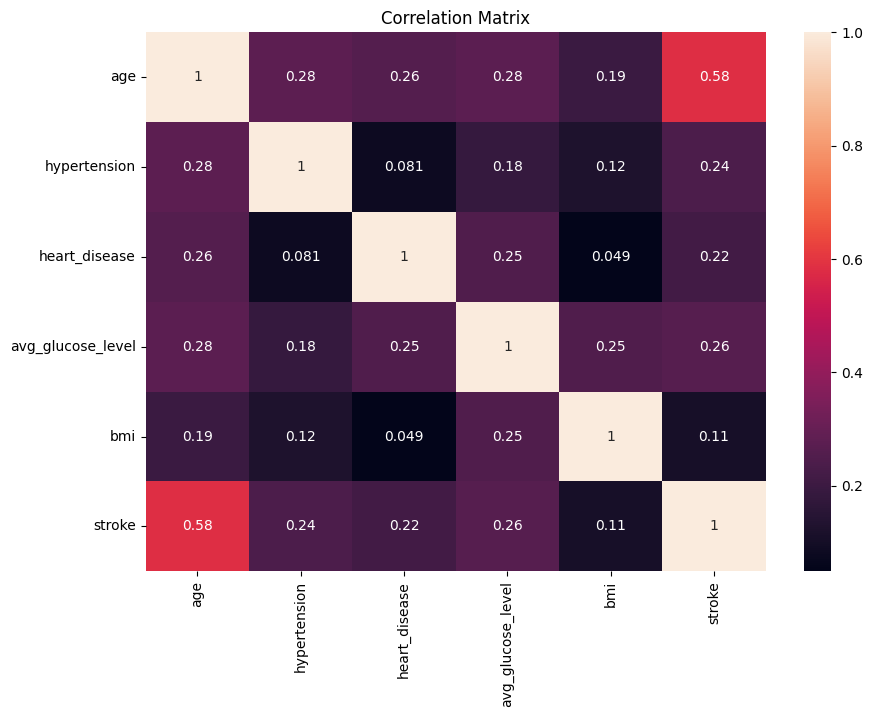

In [44]:
_, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, ax=ax)
plt.title('Correlation Matrix')
plt.show()

We can see that, with respect to stroke, bmi has the least correlation with. So hence we do not required it

# Creating model

Froom performing EDA, we have understood that age, hypertension, heart_disease, avg_glucose_level, ever_married, work_type, smoking_status have correlation with stroke.

In [45]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0


In [46]:
df['gender'] = df['gender'].map({'Male':1,'Female':0})
df['ever_married'] = df['ever_married'].map({'Yes':1,'No':0})
df['work_type'] = df['work_type'].map({'Private':0,'Self-employed':1,'Govt_job':2,'children':3,'Never_worked':4})
df['smoking_status'] = df['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':3})

In [47]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,3.0,0,0,0,3,Rural,95.12,18.0,1,0
1,1.0,58.0,1,0,1,0,Urban,87.96,39.2,0,0
2,0.0,8.0,0,0,0,0,Urban,110.89,17.6,1,0
3,0.0,70.0,0,0,1,0,Rural,69.04,35.9,2,0
4,1.0,14.0,0,0,0,4,Rural,161.28,19.1,1,0


In [48]:
df1 = df.drop(['Residence_type','bmi'],axis=1)

In [49]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,smoking_status,stroke
0,1.0,3.0,0,0,0,3,95.12,1,0
1,1.0,58.0,1,0,1,0,87.96,0,0
2,0.0,8.0,0,0,0,0,110.89,1,0
3,0.0,70.0,0,0,1,0,69.04,2,0
4,1.0,14.0,0,0,0,4,161.28,1,0


In [50]:
df1.isnull().sum()

gender               1
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [51]:
df1 = df1.dropna()

In [52]:
df1.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9721 entries, 0 to 9721
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             9721 non-null   float64
 1   age                9721 non-null   float64
 2   hypertension       9721 non-null   int64  
 3   heart_disease      9721 non-null   int64  
 4   ever_married       9721 non-null   int64  
 5   work_type          9721 non-null   int64  
 6   avg_glucose_level  9721 non-null   float64
 7   smoking_status     9721 non-null   int64  
 8   stroke             9721 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 759.5 KB


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split

In [55]:
X = df1.drop(['stroke'],axis=1)
y = df1['stroke']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Random Forests

In [57]:
models = {}
param_grid = {'n_estimators':[20,40,50],
             'max_depth':[4,5,None],
             'max_features':[0.2,0.6,1.0]}

rf = RandomForestClassifier()

rf_grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5)
rf_grid.fit(X_train,y_train)
y_pred_rf = rf_grid.predict(X_test)

models['Random Forests'] = accuracy_score(y_pred_rf,y_test)   #testing_accuracy

In [58]:
rf_grid.best_params_

{'max_depth': None, 'max_features': 0.6, 'n_estimators': 50}

In [59]:
rf_grid.best_score_    #training accuracy

0.9804526405409202

Decision Trees

In [60]:
param_grid = {'criterion':['gini', 'entropy'],
             'max_depth': [4,5,10,None],
             'max_features':[0.2,0.6,1.0]}

dtc = DecisionTreeClassifier()

dtc_grid = GridSearchCV(estimator=dtc,param_grid=param_grid,cv=5,verbose=1)
dtc_grid.fit(X_train,y_train)
y_pred_dtc = dtc_grid.predict(X_test)

models['Decision Trees'] = accuracy_score(y_pred_dtc,y_test)    #testing accuracy

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [61]:
dtc_grid.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6}

In [62]:
dtc_grid.best_score_   #training_accuracy

0.9700362872895296

Logistic Regression

In [63]:
param_grid = {
    'penalty':['l1','l2'],
    'C' : [1,5,10,20,40]
}
lr_clf = LogisticRegression()

lr_grid = GridSearchCV(estimator=lr_clf,param_grid=param_grid,cv=5,verbose=1)

lr_grid.fit(X_train,y_train)
y_pred_lr = lr_grid.predict(X_test)
models['Logistic Regression'] = accuracy_score(y_pred_lr,y_test)  #testing accuracy

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\91886\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91886\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C:\Users\91886\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91886\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [64]:
lr_grid.best_params_

{'C': 5, 'penalty': 'l2'}

In [65]:
lr_grid.best_score_

0.7695481860488183

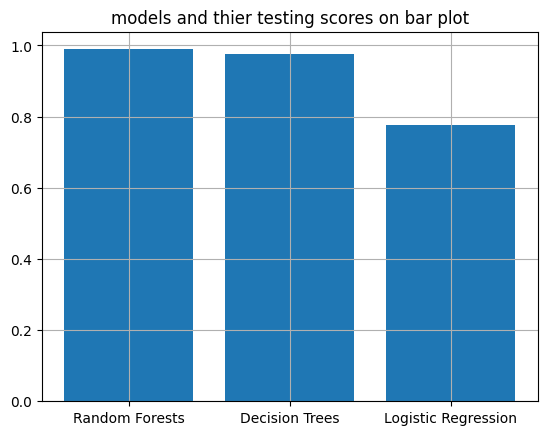

In [66]:
plt.bar(range(len(models)), list(models.values()))
plt.xticks(range(len(models)), list(models.keys()))
plt.title('models and thier testing scores on bar plot')
plt.grid()

In [67]:
model_names = ['Random_Forests', 'Decision Trees', 'Logistic Regression']
training_accuracy = [rf_grid.best_score_,dtc_grid.best_score_,lr_grid.best_score_]
testing_accuracy = [accuracy_score(y_pred_rf,y_test),accuracy_score(y_pred_dtc,y_test),accuracy_score(y_pred_lr,y_test)]

data = {'Model Name': model_names, 'Training Accuracy': training_accuracy, 'Testing Accuracy': testing_accuracy}
df = pd.DataFrame(data)

In [68]:
df

,Model Name,Training Accuracy,Testing Accuracy
0,Random_Forests,0.980453,0.989203
1,Decision Trees,0.970036,0.975321
2,Logistic Regression,0.769548,0.776864
